In [1]:
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

cell_pop = ObjectCreator(
    type='CellPopulation',
    inherits_from='Cell',
    contained_objects=['Cell']
)
cell_pop.validate()
cell_pop.register(overwrite=True)
cell_pop.save(filename='cell_population.json')

Schema saved to schema/object/cell_population.json


In [2]:
cell_sorting = ModelBuilder(model_name='cell_sorting')
cell_sorting.add_object(name='dark', object_type='CellPopulation')
cell_sorting.add_object(name='light', object_type='CellPopulation')
cell_sorting.add_object(name='environment', object_type='CellField', contained_objects=["dark", "light"])
cell_sorting.add_object(name='external_material', object_type='Material')
cell_sorting.add_process(name='volume exclusion', process_type='VolumeExclusion',
                    participating_objects=["dark", "light", "external_material"])
cell_sorting.add_process(name='contact', process_type='ContactForce', participating_objects=["environment"])
cell_sorting.add_process(name='fluctuation', process_type='MotileForce', participating_objects=["dark", "light"])

In [3]:
cell_sorting.validate()

In [4]:
cell_sorting.save(filename='cell_sorting.json')

Model saved to models/cell_sorting.json


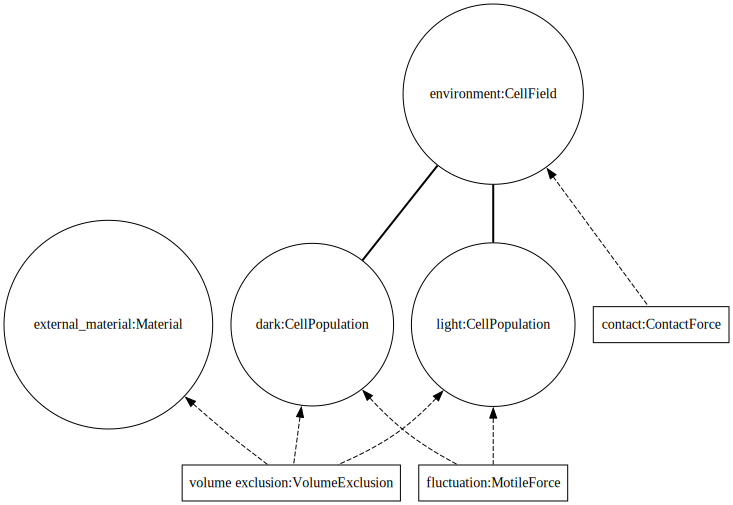

In [5]:
cell_sorting.graph()